# Storytelling Data Visualization on Exchange Rates

## Introducing the Dataset

<span style="font-family:verdana">Let's import libries that we need, in our analysis.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<span style="font-family:verdana">And read our dataset:
   

In [8]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-05-26,1.6439,1.9558,5.3878,1.4630,0.9707,7.5874,NaN,23.648,7.4489,...,4.9572,NaN,11.5280,1.4520,NaN,NaN,37.2630,21.5340,1.0751,21.0148
1,2023-05-25,1.6443,1.9558,5.3320,1.4599,0.9708,7.5891,NaN,23.645,7.4502,...,4.9495,NaN,11.5490,1.4515,NaN,NaN,37.1540,21.3944,1.0735,20.7466
2,2023-05-24,1.6402,1.9558,5.3397,1.4600,0.9732,7.6005,NaN,23.671,7.4477,...,4.9614,NaN,11.5103,1.4526,NaN,NaN,37.1710,21.4487,1.0785,20.7479
3,2023-05-23,1.6282,1.9558,5.3649,1.4571,0.9718,7.6039,NaN,23.681,7.4475,...,4.9720,NaN,11.4494,1.4527,NaN,NaN,37.4350,21.3993,1.0779,20.7920
4,2023-05-22,1.6294,1.9558,5.4056,1.4618,0.9700,7.6067,NaN,23.676,7.4478,...,4.9737,NaN,11.3765,1.4554,NaN,NaN,37.2820,21.4629,1.0822,20.9137


In [9]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
6306,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6307,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6308,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6309,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
6310,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [10]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6311 non-null   object 
 1   [Australian dollar ]      6311 non-null   object 
 2   [Bulgarian lev ]          5909 non-null   object 
 3   [Brazilian real ]         6043 non-null   object 
 4   [Canadian dollar ]        6311 non-null   object 
 5   [Swiss franc ]            6311 non-null   object 
 6   [Chinese yuan renminbi ]  6043 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6311 non-null   object 
 9   [Danish krone ]           6311 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6311 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6311 non-null   object 
 14  [Croatia

## Data Cleaning

<span style="font-family:verdana">As we see, units are in the gaps '[]' - for easier way to work - let's rename it:

In [11]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                               inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [12]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1268     7
1.1305     7
          ..
1.4030     1
1.4113     1
1.4106     1
1.4127     1
1.0751     1
Name: US_dollar, Length: 3734, dtype: int64

In [13]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 6310
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6249 non-null   datetime64[ns]
 1   US_dollar  6249 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 146.5 KB


## Rolling Mean

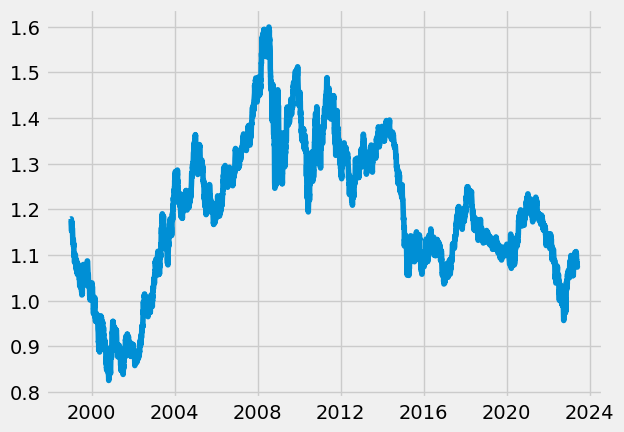

In [14]:
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

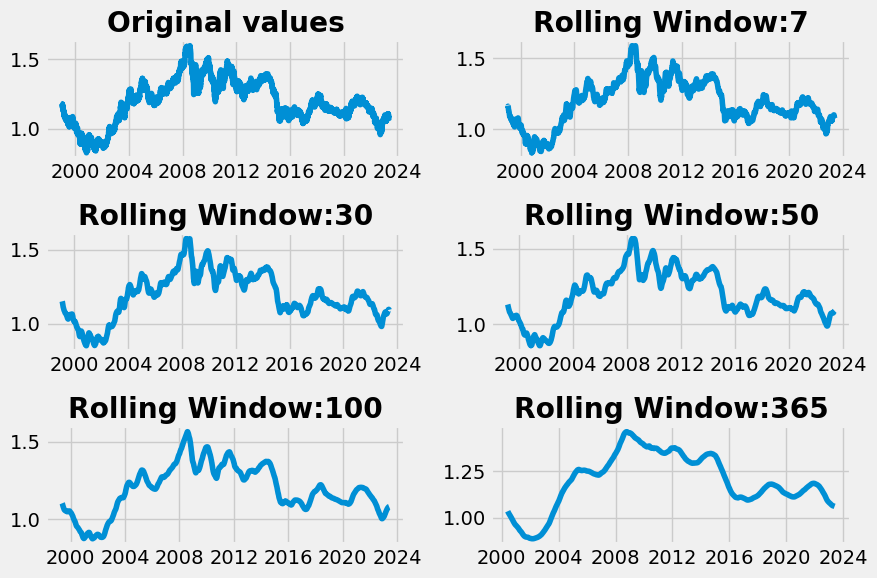

In [15]:
plt.figure(figsize=(9, 6))

plt.subplot(3, 2, 1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip ([2, 3, 4, 5, 6],
                            [7, 30, 50, 100, 365]):
    plt.subplot(3, 2, i)
    plt.plot(euro_to_dollar['Time'],
            euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout()
plt.show()

In [16]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
6306,2023-05-22,1.0822,1.095337
6307,2023-05-23,1.0779,1.094883
6308,2023-05-24,1.0785,1.094483
6309,2023-05-25,1.0735,1.093860


## Coming Up With an Idea

<span style="font-family:verdana">Here are a few story ideas based on the provided data:
- <span style="font-family:verdana">`Euro-Dollar Rate During the Coronavirus Pandemic`: In this story, we can analyze and compare the euro-dollar exchange rate during the coronavirus pandemic (2020) with the baseline years of 2016-2019. Using a line plot, we can visually depict the fluctuations in the exchange rate and highlight any significant trends or changes that occurred during the pandemic period.
- <span style="font-family:verdana">`Euro-Dollar Rate During the 2007-2008 Financial Crisis`: This story focuses on the euro-dollar exchange rate during the 2007-2008 financial crisis. By comparing the exchange rate data for the crisis period with the years 2016 and 2009, we can illustrate the impact of the financial crisis on the exchange rate. Utilizing a line plot, we can highlight the magnitude of the changes and the subsequent recovery or stabilization of the exchange rate.
- <span style="font-family:verdana">`Comparative Analysis of Euro-Dollar Rate under Recent US Presidents`: In this story, we can examine and compare the euro-dollar exchange rate during the presidencies of George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021). By using a line plot, we can depict the exchange rate trends and fluctuations during each presidency, enabling readers to observe any patterns or notable differences in how the exchange rate evolved under each administration.
    
<span style="font-family:verdana">These story ideas provide opportunities to analyze historical data, identify trends, and explore the factors influencing the euro-dollar exchange rate in different contexts. Visualizing the data through line plots helps to convey the information effectively and engage the audience in understanding the dynamics of the exchange rate fluctuations over time.

## Storytelling Data Visualization Examples

### Examples

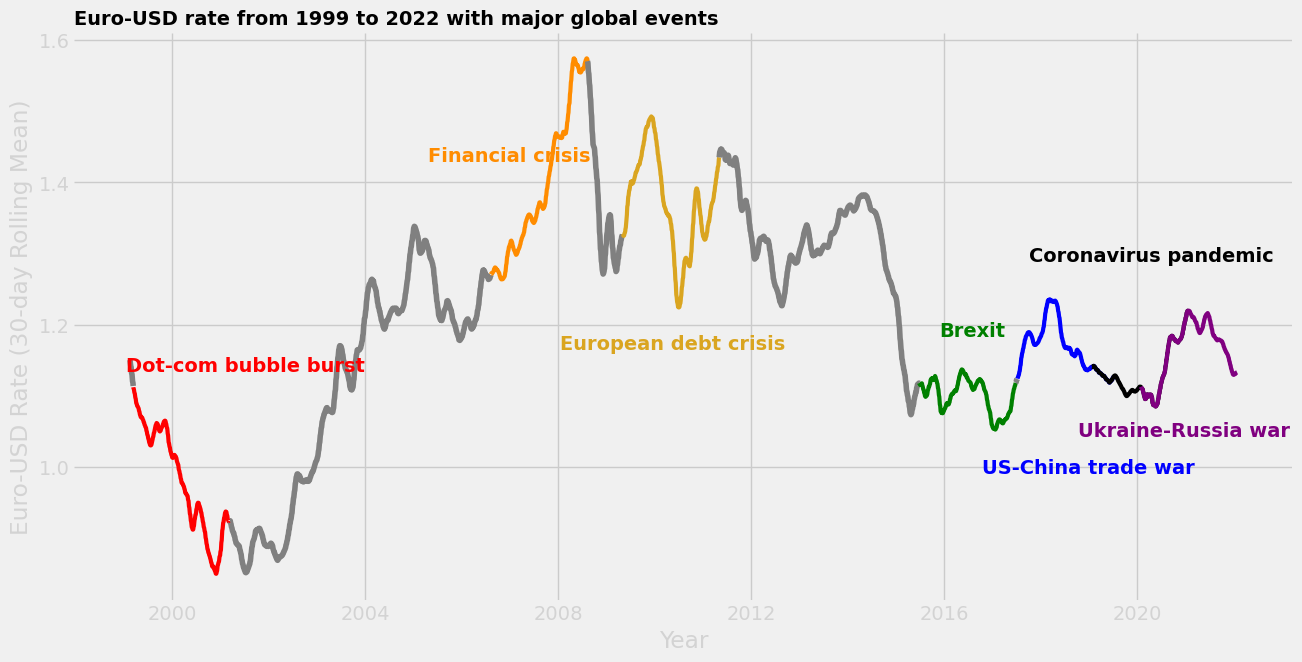

In [37]:
# Define major global events
events = [
    {'date': '2000-03-10', 'label': 'Dot-com bubble burst', 'color': 'red', 'text_position': (-40, 80)},
    {'date': '2007-08-09', 'label': 'Financial crisis', 'color': 'darkorange', 'text_position': (-80, 30)},
    {'date': '2010-05-02', 'label': 'European debt crisis', 'color': 'goldenrod', 'text_position': (-80, -90)},
    {'date': '2016-06-23', 'label': 'Brexit', 'color': 'green', 'text_position': (-20, 30)},
    {'date': '2018-07-06', 'label': 'US-China trade war', 'color': 'blue', 'text_position': (-60, -90)},
    {'date': '2020-01-21', 'label': 'Coronavirus pandemic', 'color': 'black', 'text_position': (-80, 90)},
    {'date': '2021-01-24', 'label': 'Ukraine-Russia war', 'color': 'purple', 'text_position': (-80, -90)},
]

fig, ax = plt.subplots(figsize=(14, 7))

# Helper function to get the start and end dates for coloring
def get_start_end_dates(event_date, delta_days=365):
    start_date = pd.to_datetime(event_date) - pd.Timedelta(days=delta_days)
    end_date = pd.to_datetime(event_date) + pd.Timedelta(days=delta_days)
    return start_date, end_date

# Helper function to find the nearest date in the DataFrame
def find_nearest_date(df, target_date):
    nearest_date = df['Time'].iloc[(df['Time'] - target_date).abs().argsort()[:1]].values[0]
    return nearest_date

# Color the stroke of the graph where each event happend
for i, event in enumerate(events):
    start_date, end_date = get_start_end_dates(event['date'])
    if i == 0:
        prev_start_date = euro_to_dollar['Time'].min()
    else:
        prev_start_date = get_start_end_dates(events[i-1]['date'])[1]
        
    mask_prev = (euro_to_dollar['Time'] >= prev_start_date) & (euro_to_dollar['Time'] < start_date)
    mask_event = (euro_to_dollar['Time'] >= start_date) & (euro_to_dollar['Time'] <= end_date)
    
    ax.plot(euro_to_dollar['Time'][mask_prev], euro_to_dollar['rolling_mean'][mask_prev], color='grey')
    ax.plot(euro_to_dollar['Time'][mask_event], euro_to_dollar['rolling_mean'][mask_event], color=event['color'],linewidth=3)

# Iterate through the events and add annotations
for event in events:
    event_time = pd.to_datetime(event['date'])
    nearest_date = find_nearest_date(euro_to_dollar, event_time)
    event_value_series = euro_to_dollar.loc[euro_to_dollar['Time'] == nearest_date, 'rolling_mean']
    
    event_value = event_value_series.values[0]
    
    # Adjust the text position based on the event label
    text_position = event['text_position']
    
    ax.annotate(event['label'], xy=(nearest_date, event_value), xycoords='data', xytext=event['text_position'], textcoords='offset points', color=event['color'], weight='bold')
    
    
ax.set_title('Euro-USD rate from 1999 to 2022 with major global events', weight='bold', fontsize=14, ha='left', x=0)

ax.set_xlabel('Year', color='lightgrey')
ax.set_ylabel('Euro-USD Rate (30-day Rolling Mean)', color='lightgrey')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('lightgrey')
ax.spines['left'].set_color('lightgrey')

ax.tick_params(axis='both', colors='lightgrey')

# ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.yaxis.set_major_locator(plt.MaxNLocator(4))

plt.show()

### Comparing presidents

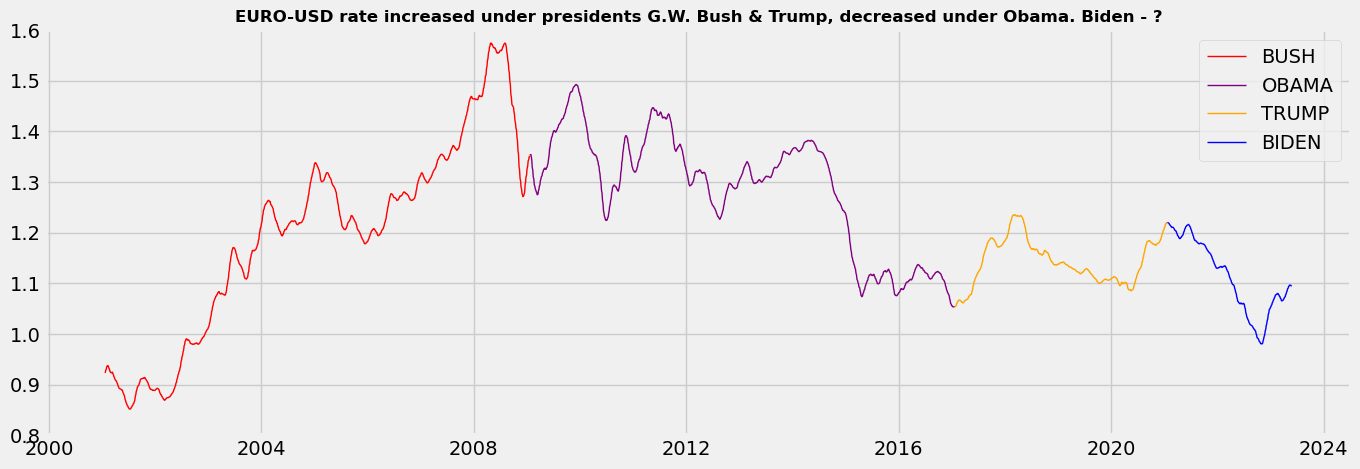

In [41]:
# Isolate the years of each presidency
bush = euro_to_dollar[(euro_to_dollar['Time'] > '2001-01-20') & (euro_to_dollar['Time'] < '2009-01-20')]
obama = euro_to_dollar[(euro_to_dollar['Time'] > '2009-01-20') & (euro_to_dollar['Time'] < '2017-01-20')]
trump = euro_to_dollar[(euro_to_dollar['Time'] > '2017-01-20') & (euro_to_dollar['Time'] < '2021-01-20')]
biden = euro_to_dollar[(euro_to_dollar['Time'] > '2021-01-20') & (euro_to_dollar['Time'] < '2023-05-26')]

# Create lists to loop through
presidencies = [bush, obama, trump, biden]
labels = ['BUSH', 'OBAMA', 'TRUMP', 'BIDEN']
colors = ['red', 'purple', 'orange', 'blue']

# Set up the plot
style.use('fivethirtyeight')
plt.figure(figsize=(15, 5))

# Create the charts
plt.title('EURO-USD rate increased under presidents G.W. Bush & Trump, decreased under Obama. Biden - ?', fontsize=12, weight='bold')

for i in range(4):
    
    sns.lineplot(
        data = presidencies[i],
        x = 'Time',
        y = 'rolling_mean',
        color = colors[i],
        lw = 1,
        label = labels[i]
    ).set(
    xlabel = '',
    ylabel = '',
    ylim = (0.8, 1.6),
    )
    
plt.legend()

plt.show()

## Conclusion

<span style="font-family:verdana">In conclusion, this data analysis focused on visualizing the daily euro exhange rates with the U.S. Dollar from 1999 to 2022. By cleaning and formatting the data appropriately, we were able to create informative visualizations that revealed interesting insights about the exchange rate trends.

<span style="font-family:verdana">The initial line plot showcased the raw exchange rate data, which exhibited substantial daily fluctuations. To better understand the long-term trends and mitigate the impact of noise, a 30-day rolling mean was applied. This technique smoothed out the graph, making it easier to discern the overall patterns and changes in the exchange rate over time. The smoothed visualization provided a clearer picture of the general trends and helped identify periods of significant growth or decline in the euro-dollar exchange rate.

<span style="font-family:verdana">By employing visualizations, we were able to effectively communicate the story behind the exchange rate data. The analysis highlighted the volatility of daily exchange rates while emphasizing the broader patterns that emerged when using a rolling mean. These visual representations provide valuable insights into the historical performance of the euro against the U.S. Dollar and can assist in making informed decisions or predictions in the realm of international finance.